In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import sklearn.decomposition


In [122]:
mesures_normees = pd.read_csv("../preprocessing/donnees_mesures_PM2_5.csv",sep=';')
env_normees = pd.read_csv("../preprocessing/donnees_environnement_capteurs.csv",sep=';')
env_normees

,Capteurs,Typologie_zone,Type_voie,Nombre_voies,Distance_capteur_voie,Position_capteurs,Presence_arbres,Feuille_arbres,Morphologie_urbaine,Hauteur_batiments,Distance_capteur_batiment,Particularite,Trafic_Routier_vehicule_leger,Trafic_Routier_poids_lourds,Trafic_Routier_2_roues,emission_moyenne_annuelle_kg_maille_an,Donnees_Cartographie
0,c1,-0.517024,0.430795,-1.320749,-1.290219,0.877568,0.808421,-0.094694,-0.40209,-0.239525,-0.958066,1.215253,1.086158,1.353421,1.105770,0.943359,1.209708
1,c2,-0.517024,0.430795,-1.320749,-1.290219,-0.573411,0.808421,-0.094694,-0.40209,-0.820374,0.388781,-1.688184,1.086158,1.353421,1.105770,0.943359,1.209708
2,c3,-0.517024,-1.934512,-1.320749,-1.290219,-2.508050,0.808421,-0.094694,-0.40209,-0.820374,-0.958066,-0.817153,1.086158,1.353421,1.105770,0.943359,0.299326
3,c4,-0.517024,-1.934512,-1.320749,-1.290219,-0.573411,0.808421,-0.094694,-0.40209,-0.820374,-0.958066,-1.107497,1.086158,1.353421,1.105770,0.943359,1.957521
4,c5,-0.517024,0.430795,-1.320749,-1.290219,0.877568,0.808421,-0.094694,-0.40209,-0.239525,-0.958066,1.215253,1.086158,1.353421,1.105770,0.943359,0.413124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,c93,0.958016,0.430795,-0.206726,0.830989,0.877568,0.808421,-0.094694,-0.40209,0.922172,-0.060168,-0.236465,-0.723478,-0.717663,-0.754825,0.528258,0.185529
93,c94,0.958016,0.430795,0.350286,-0.583150,-0.089751,0.808421,-0.094694,-0.40209,-1.982071,-0.060168,0.634566,-0.723478,-0.717663,-0.754825,0.528258,0.348097
94,c95,0.958016,1.219230,-0.206726,0.830989,0.877568,0.808421,1.742374,-0.40209,-0.239525,-0.958066,1.215253,-0.723478,-0.717663,-0.754825,-0.664124,-0.838650
95,c96,0.958016,0.430795,0.350286,0.830989,0.877568,0.808421,1.742374,-0.40209,-0.239525,-0.958066,-0.526809,0.186410,-0.689370,0.211407,-0.664124,-0.269662


In [123]:
Capteurs = env_normees['Capteurs']
env_normees = env_normees.drop(env_normees.columns[0], axis=1)
env_normees

,Typologie_zone,Type_voie,Nombre_voies,Distance_capteur_voie,Position_capteurs,Presence_arbres,Feuille_arbres,Morphologie_urbaine,Hauteur_batiments,Distance_capteur_batiment,Particularite,Trafic_Routier_vehicule_leger,Trafic_Routier_poids_lourds,Trafic_Routier_2_roues,emission_moyenne_annuelle_kg_maille_an,Donnees_Cartographie
0,-0.517024,0.430795,-1.320749,-1.290219,0.877568,0.808421,-0.094694,-0.40209,-0.239525,-0.958066,1.215253,1.086158,1.353421,1.105770,0.943359,1.209708
1,-0.517024,0.430795,-1.320749,-1.290219,-0.573411,0.808421,-0.094694,-0.40209,-0.820374,0.388781,-1.688184,1.086158,1.353421,1.105770,0.943359,1.209708
2,-0.517024,-1.934512,-1.320749,-1.290219,-2.508050,0.808421,-0.094694,-0.40209,-0.820374,-0.958066,-0.817153,1.086158,1.353421,1.105770,0.943359,0.299326
3,-0.517024,-1.934512,-1.320749,-1.290219,-0.573411,0.808421,-0.094694,-0.40209,-0.820374,-0.958066,-1.107497,1.086158,1.353421,1.105770,0.943359,1.957521
4,-0.517024,0.430795,-1.320749,-1.290219,0.877568,0.808421,-0.094694,-0.40209,-0.239525,-0.958066,1.215253,1.086158,1.353421,1.105770,0.943359,0.413124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.958016,0.430795,-0.206726,0.830989,0.877568,0.808421,-0.094694,-0.40209,0.922172,-0.060168,-0.236465,-0.723478,-0.717663,-0.754825,0.528258,0.185529
93,0.958016,0.430795,0.350286,-0.583150,-0.089751,0.808421,-0.094694,-0.40209,-1.982071,-0.060168,0.634566,-0.723478,-0.717663,-0.754825,0.528258,0.348097
94,0.958016,1.219230,-0.206726,0.830989,0.877568,0.808421,1.742374,-0.40209,-0.239525,-0.958066,1.215253,-0.723478,-0.717663,-0.754825,-0.664124,-0.838650
95,0.958016,0.430795,0.350286,0.830989,0.877568,0.808421,1.742374,-0.40209,-0.239525,-0.958066,-0.526809,0.186410,-0.689370,0.211407,-0.664124,-0.269662


In [124]:
# pca = PCA(n_components=2)
# mesures_acp = pca.fit_transform(mesures_normees)
# tsne = TSNE(n_components=2, random_state=42)
# mesures_tsne = tsne.fit_transform(mesures_acp)

# plt.figure(figsize=(12, 6))

# # Nuage de points de l'ACP
# plt.subplot(1, 2, 1)
# plt.scatter(mesures_acp[:, 0], mesures_acp[:, 1],s=0.1)
# plt.title("ACP")

# # Nuage de points t-SNE
# plt.subplot(1, 2, 2)
# plt.scatter(mesures_tsne[:, 0], mesures_tsne[:, 1],s=0.1)
# plt.title("t-SNE")

# plt.show()




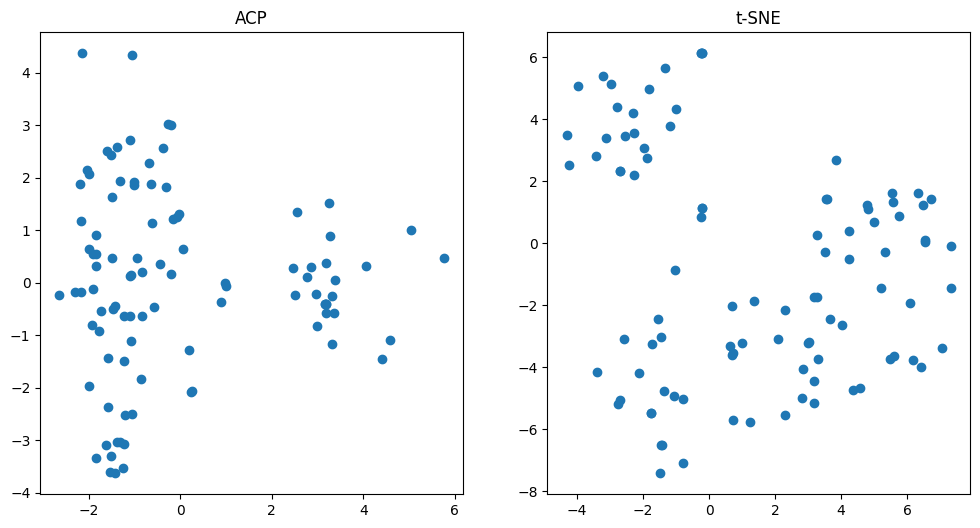

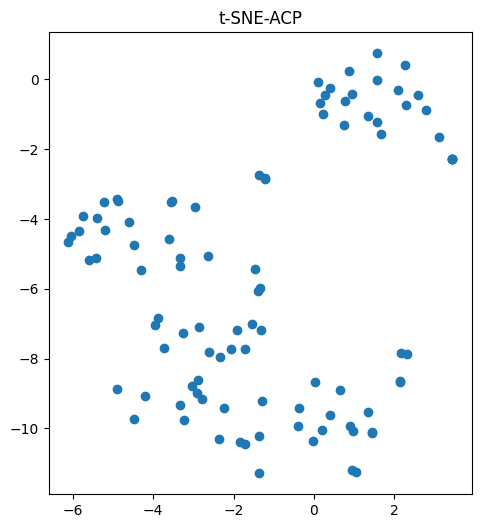

In [125]:
pca = PCA(n_components=4)
env_acp = pca.fit_transform(env_normees)

tsne = TSNE(n_components=2, random_state=42)
env_tsne_acp = tsne.fit_transform(env_acp)
env_tsne = tsne.fit_transform(env_normees)

plt.figure(figsize=(12, 6))

# Nuage de points de l'ACP
plt.subplot(1, 2, 1)
plt.scatter(env_acp[:, 0], env_acp[:, 1])
plt.title("ACP")

# Nuage de points t-SNE
plt.subplot(1, 2, 2)
plt.scatter(env_tsne[:, 0], env_tsne[:, 1])
plt.title("t-SNE")

plt.figure(figsize=(12, 6))

# Nuage de points t-SNE-ACP
plt.subplot(1, 2, 2)
plt.scatter(env_tsne_acp[:, 0], env_tsne_acp[:, 1])
plt.title("t-SNE-ACP")

plt.show()

In [126]:
matrice_corr = env_normees.corr()
matrice_corr

,Typologie_zone,Type_voie,Nombre_voies,Distance_capteur_voie,Position_capteurs,Presence_arbres,Feuille_arbres,Morphologie_urbaine,Hauteur_batiments,Distance_capteur_batiment,Particularite,Trafic_Routier_vehicule_leger,Trafic_Routier_poids_lourds,Trafic_Routier_2_roues,emission_moyenne_annuelle_kg_maille_an,Donnees_Cartographie
Typologie_zone,1.000000,-0.220877,0.248868,0.370505,0.052886,-0.047574,0.069767,-0.347928,0.207387,-0.201783,0.173556,-0.209963,-0.235349,-0.225360,0.053727,-0.101846
Type_voie,-0.220877,1.000000,-0.123736,-0.197064,0.231297,0.123229,0.145318,0.252474,-0.029009,0.120798,-0.027930,0.126842,0.152644,0.129805,0.071804,0.039661
Nombre_voies,0.248868,-0.123736,1.000000,0.192088,0.148088,-0.147471,-0.003752,-0.195107,0.137270,-0.118138,0.256226,-0.728442,-0.700993,-0.731524,-0.307444,-0.488624
Distance_capteur_voie,0.370505,-0.197064,0.192088,1.000000,-0.147529,-0.382069,-0.302956,-0.234479,0.101660,-0.123446,0.016604,-0.293408,-0.227236,-0.297856,0.137896,-0.048350
Position_capteurs,0.052886,0.231297,0.148088,-0.147529,1.000000,0.308228,0.280040,-0.073903,0.172549,-0.034501,0.166979,-0.243835,-0.155039,-0.238002,-0.178201,-0.227337
Presence_arbres,-0.047574,0.123229,-0.147471,-0.382069,0.308228,1.000000,0.747910,0.169085,-0.012202,0.267400,0.049689,0.075030,0.064935,0.078650,-0.312424,-0.194273
Feuille_arbres,0.069767,0.145318,-0.003752,-0.302956,0.280040,0.747910,1.000000,0.126073,0.021321,0.198364,0.024348,-0.111425,-0.135904,-0.112689,-0.371634,-0.336961
Morphologie_urbaine,-0.347928,0.252474,-0.195107,-0.234479,-0.073903,0.169085,0.126073,1.000000,-0.556931,0.557476,-0.276683,-0.016390,0.010322,-0.010161,-0.307084,-0.216647
Hauteur_batiments,0.207387,-0.029009,0.137270,0.101660,0.172549,-0.012202,0.021321,-0.556931,1.000000,-0.194532,0.134608,-0.116751,-0.115277,-0.123036,0.270166,0.032952
Distance_capteur_batiment,-0.201783,0.120798,-0.118138,-0.123446,-0.034501,0.267400,0.198364,0.557476,-0.194532,1.000000,-0.239988,-0.091284,0.036386,-0.081452,-0.293546,-0.191614


In [127]:
matrice_corr_sup = np.triu(matrice_corr, k=1)

maximum_corr = np.max(matrice_corr_sup)
indice_max = np.unravel_index(np.argmax(matrice_corr_sup), matrice_corr_sup.shape)
ligne_max, colonne_max = indice_max

indice_min = np.unravel_index(np.argmin(matrice_corr_sup), matrice_corr_sup.shape)
ligne_min, colonne_min = indice_min
minimum_corr = np.min(matrice_corr_sup)

print(matrice_corr.columns[colonne_max],matrice_corr.index[ligne_max],maximum_corr)
print(matrice_corr.columns[colonne_min],matrice_corr.index[ligne_min],minimum_corr)

Trafic_Routier_2_roues Trafic_Routier_vehicule_leger 0.9991026834241685
Trafic_Routier_2_roues Nombre_voies -0.7315241329192781


In [128]:
# Obtenir les indices des données les moins corrélées
indice_min = np.unravel_index(np.argmin(np.abs(matrice_corr)), matrice_corr.shape)
ligne_min, colonne_min = indice_min
minimum_corr = np.min(np.abs(matrice_corr))

In [129]:
print(matrice_corr.columns[colonne_min],matrice_corr.index[ligne_min],minimum_corr)

Feuille_arbres Nombre_voies 0.0037520200029214487


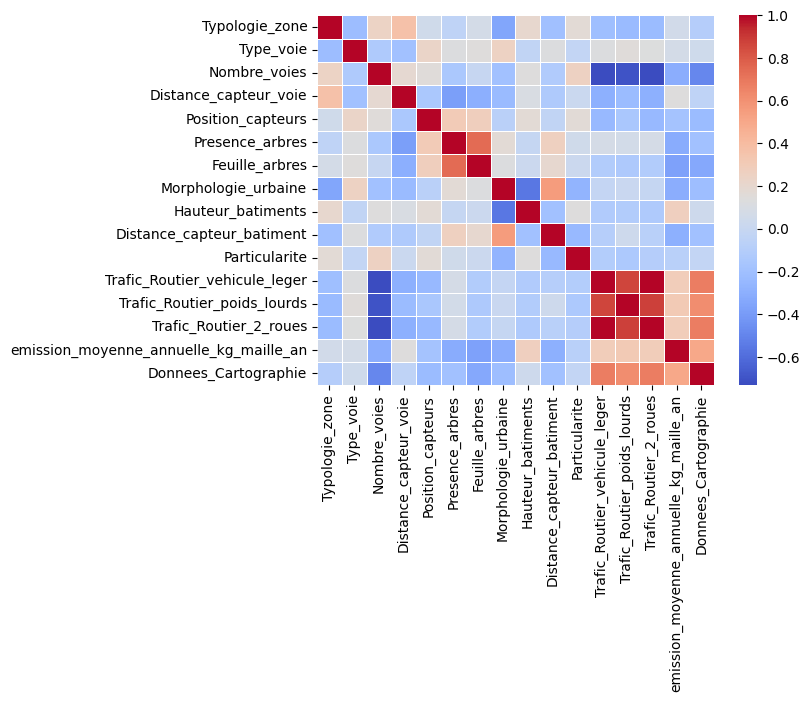

In [130]:
import seaborn as sns


# Créez un heatmap de la matrice de corrélation avec Seaborn
sns.heatmap(matrice_corr, annot=False, cmap='coolwarm', linewidths=0.5)

# Affichez la heatmap
plt.show()


[[ 2.76251704  0.11482272 -1.93690145 -0.61322455]
 [ 3.27090855  0.89313031  0.06327509  0.07876751]
 [ 2.96634636 -0.2198944   0.50590552  2.28311399]
 [ 3.32230458 -0.2580928  -0.23277423  1.53586695]
 [ 2.47313163  0.26931918 -1.89837942 -0.58774601]
 [ 3.31032931 -1.1766451   1.77483784  0.85010147]
 [ 2.84817357  0.30243842 -0.26744173  0.03983396]
 [ 3.19099524  0.36544554 -1.40464352 -0.48565791]
 [ 3.24832699  1.52175759 -0.85102523 -0.98330504]
 [ 3.3859805   0.04623737 -1.27997655 -0.31286838]
 [-1.24685162 -3.53697061  0.59658413  0.22963592]
 [-1.38375107 -3.03900316  0.2798575  -0.27677589]
 [-1.51015144 -3.29438826 -0.15357841 -0.46571995]
 [-1.22589701 -3.07441134 -0.3335995  -1.51634217]
 [-1.41555508 -3.6327706   0.69013242  0.7572869 ]
 [-1.30857851 -3.03026952 -0.32259321 -1.50906259]
 [-1.58332573 -1.44282904 -0.53528915 -1.19405034]
 [ 2.98796475 -0.82047794 -1.9922529  -1.10665625]
 [ 2.51333848 -0.24379667 -1.07535443 -0.86682018]
 [ 3.18869423 -0.57885105 -1.36

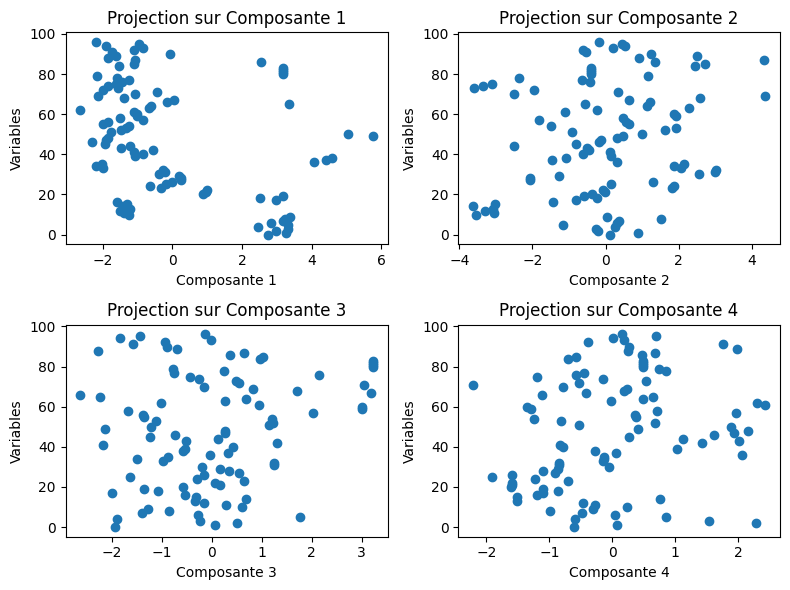

In [131]:

pca=sklearn.decomposition.PCA(n_components=4)
pca.fit(env_normees)
projections=pca.transform(env_normees)

print(projections)

# Obtenez les composantes principales (vecteurs propres)
composantes_principales = pca.components_

# Tracez les projections
plt.figure(figsize=(8, 6))
for i in range(4):  # Boucle sur les 4 composantes principales
    plt.subplot(2, 2, i+1)
    plt.scatter(projections[:, i], range(len(projections)))
    plt.title(f'Projection sur Composante {i + 1}')
    plt.xlabel(f'Composante {i + 1}')
    plt.ylabel('Variables')

plt.tight_layout()
plt.show()



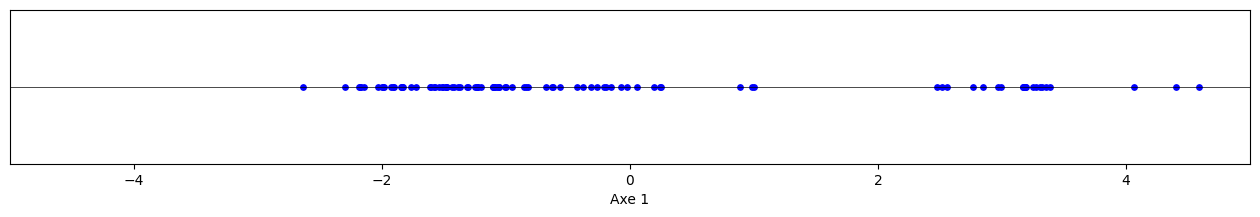

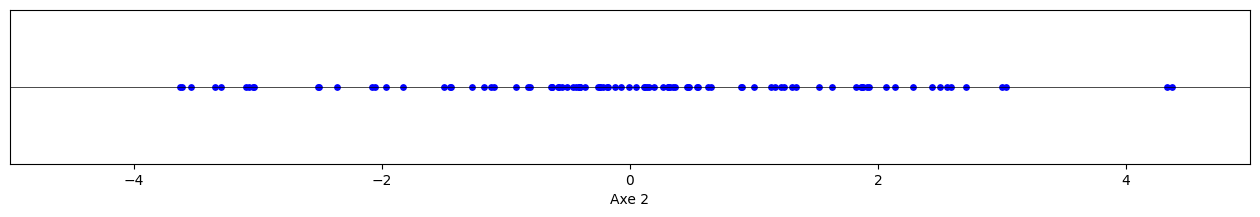

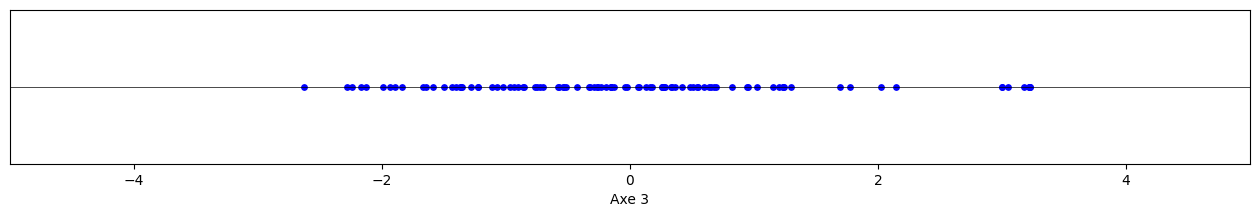

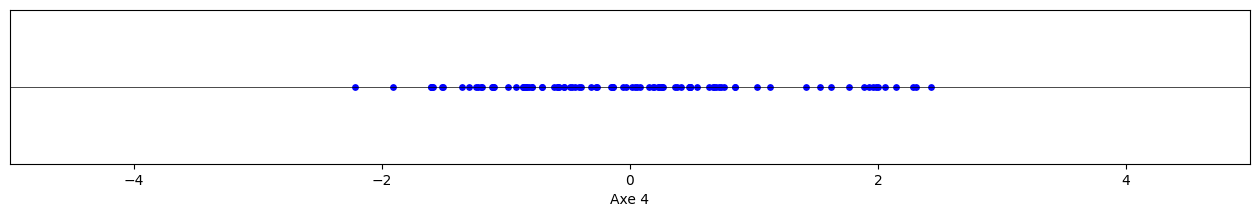

In [132]:

for i in range (len(np.transpose(projections))):
    donnees_1d = np.transpose(projections)[i]
# Créez un graphique 1D avec des points
# Créez un graphique 1D avec des points et un axe
    plt.figure(figsize=(16, 2))  # Réglez la taille du graphique
    plt.scatter(donnees_1d, [0] * len(donnees_1d), marker='o', color='blue', s=15)  # Ajustez la taille des points avec l'argument 's'
    plt.axhline(y=0, color='black', linewidth=0.5)  # Ajoutez un axe horizontal
    plt.xlabel("Axe " + str(i+1))
    plt.yticks([])  # Supprimez les marques de graduation sur l'axe des ordonnées
    plt.xlim(-5,5)
    plt.show()

Inertie de la partition pour différentes valeurs de K :
K=1: Inertie=1028.7737253989933
K=2: Inertie=654.4915634992108
K=3: Inertie=466.768795027407
K=4: Inertie=364.4000159239463
K=5: Inertie=307.5153340544706
K=6: Inertie=270.2783728667204
K=7: Inertie=243.99748658271318
K=8: Inertie=207.3014748790258
K=9: Inertie=198.22144986961945
K=10: Inertie=176.20450289033948
K=11: Inertie=162.38396733350498
K=12: Inertie=149.61716534516768
K=13: Inertie=136.73386802884335
K=14: Inertie=131.35742390077863
K=15: Inertie=125.39224781792785
K=16: Inertie=112.7757478261385
K=17: Inertie=106.33023502026097
K=18: Inertie=100.96949433707117
K=19: Inertie=97.11683882742935
K=20: Inertie=92.17583773377424
K=21: Inertie=82.64213438739225
K=22: Inertie=77.67893351694354
K=23: Inertie=81.5185725583583
K=24: Inertie=65.85440532236277
K=25: Inertie=71.19841296928229
K=26: Inertie=61.6048304229016
K=27: Inertie=61.131983274388254
K=28: Inertie=57.21099040391104
K=29: Inertie=55.433934623737294
K=30: Inertie=5

C:\Users\loulo\OneDrive\Bureau\ECOLE\IMT Nord Europe\M1\ODATA\Projet\Categorisation-de-capteurs-de-pollution\venv\lib\site-packages\sklearn\base.py:1152: ConvergenceWarning: Number of distinct clusters (96) found smaller than n_clusters (97). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


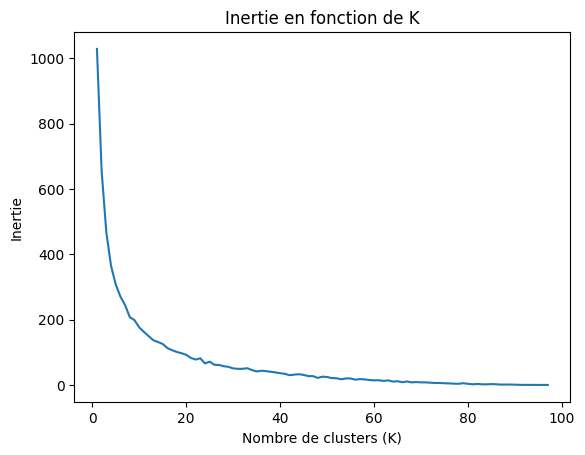

In [133]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []

for K in range(1, 98):
    kmeans = KMeans(n_clusters=K, init="random", n_init=10)

    # Ajustez le modèle aux données
    kmeans.fit(env_acp)

    # Obtenez l'inertie de la partition obtenue
    inertia = kmeans.inertia_
    inertias.append(inertia)

# Affichez les résultats
print("Inertie de la partition pour différentes valeurs de K :")
for K, inertia in zip(range(1, 98), inertias):
    print(f"K={K}: Inertie={inertia}")

# Tracez l'inertie en fonction de K
plt.plot(range(1, 98), inertias)
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie')
plt.title('Inertie en fonction de K')
plt.show()

#K=10 2 tangeantes se coupent


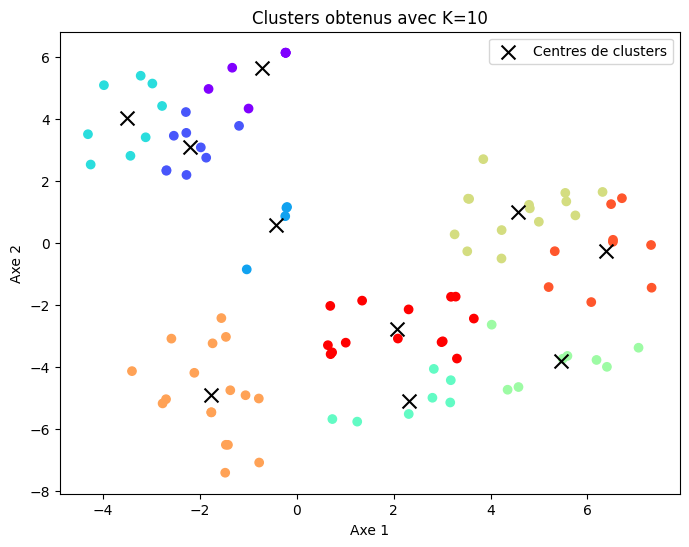

In [154]:
tsne = TSNE(n_components=2, random_state=42)
env_tsne = tsne.fit_transform(env_normees)

# Effectuez le clustering K-means avec K=10
kmeans = KMeans(n_clusters=10, init="random", n_init=10)
# Obtenez les étiquettes des clusters
kmeans.fit(env_tsne)
labels = kmeans.labels_



# Obtenez les centres des clusters
centres_clusters = kmeans.cluster_centers_

# Affichez les clusters en 2D
plt.figure(figsize=(8, 6))
plt.scatter(env_tsne[:, 0], env_tsne[:, 1], c=labels, cmap='rainbow')
plt.scatter(centres_clusters[:, 0], centres_clusters[:, 1], c='black', marker='x', s=100, label='Centres de clusters')
plt.title('Clusters obtenus avec K=10')
plt.xlabel('Axe 1')
plt.ylabel('Axe 2')
plt.legend()
plt.show()


In [143]:
print(labels)

[5 5 3 5 5 3 5 5 5 5 6 6 6 6 6 6 6 5 5 5 0 0 0 7 2 0 2 6 6 6 2 7 7 2 4 2 5
 3 5 1 6 0 1 1 6 1 1 1 1 5 5 6 7 2 6 4 4 1 4 7 7 1 1 7 7 5 0 7 7 7 6 7 6 6
 6 6 1 1 6 4 3 3 3 3 7 7 5 7 4 2 4 1 1 1 4 4 1]


In [149]:
tsne #OK

TSNE(random_state=42)